Libraries

In [2]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [3]:
tf_dataset = tf.keras.utils.image_dataset_from_directory('/content/images/images/train/',shuffle=True,
                                                         batch_size=64,image_size=(48,48),color_mode="grayscale")

Found 18977 files belonging to 7 classes.


Data Preprocessing

In [6]:
tf_dataset.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
len(tf_dataset)

297

In [8]:
train_ds = len(tf_dataset)*0.8
train_ds


237.60000000000002

In [4]:
train_ds = tf_dataset.take(220)
rem_test_ds = tf_dataset.skip(200)
test_ds = rem_test_ds.take(30)
val_ds = rem_test_ds.skip(50)

In [5]:
print('train_ds=',len(train_ds))
print('test_ds=',len(test_ds))
print('val_ds=',len(val_ds))

train_ds= 220
test_ds= 30
val_ds= 47


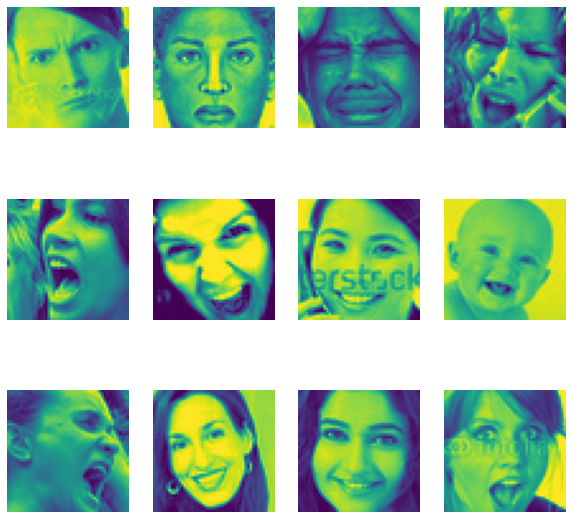

In [ ]:
plt.figure(figsize=(10,10))
for img,lbl in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.axis("off")
   

In [ ]:
train_ds=train_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

Build Model

In [ ]:
batch_size=64
image_size=48
channels=1
input_shape = (image_size,image_size,channels)
classes = len(tf_dataset.class_names)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
 

    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)      

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=50,verbose=1)

Epoch 1/50
111/111 [==============================] - 16s 13ms/step - loss: 1.9439 - accuracy: 0.5003
Epoch 2/50
111/111 [==============================] - 2s 19ms/step - loss: 1.3143 - accuracy: 0.5344
Epoch 3/50
111/111 [==============================] - 2s 14ms/step - loss: 1.2035 - accuracy: 0.5604
Epoch 4/50
111/111 [==============================] - 1s 11ms/step - loss: 1.1182 - accuracy: 0.5756
Epoch 5/50
111/111 [==============================] - 1s 11ms/step - loss: 1.0778 - accuracy: 0.5930
Epoch 6/50
111/111 [==============================] - 1s 11ms/step - loss: 1.0342 - accuracy: 0.6196
Epoch 7/50
111/111 [==============================] - 1s 11ms/step - loss: 0.9790 - accuracy: 0.6336
Epoch 8/50
111/111 [==============================] - 2s 14ms/step - loss: 0.9367 - accuracy: 0.6472
Epoch 9/50
111/111 [==============================] - 2s 17ms/step - loss: 0.8732 - accuracy: 0.6633
Epoch 10/50
111/111 [==============================] - 1s 11ms/step - loss: 0.8495 - accur

Model Testing

In [ ]:
model.evaluate(test_ds)

30/30 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.8443


[0.6964959502220154, 0.8442708253860474]

Prediction

2/2 [==============================] - 0s 6ms/step


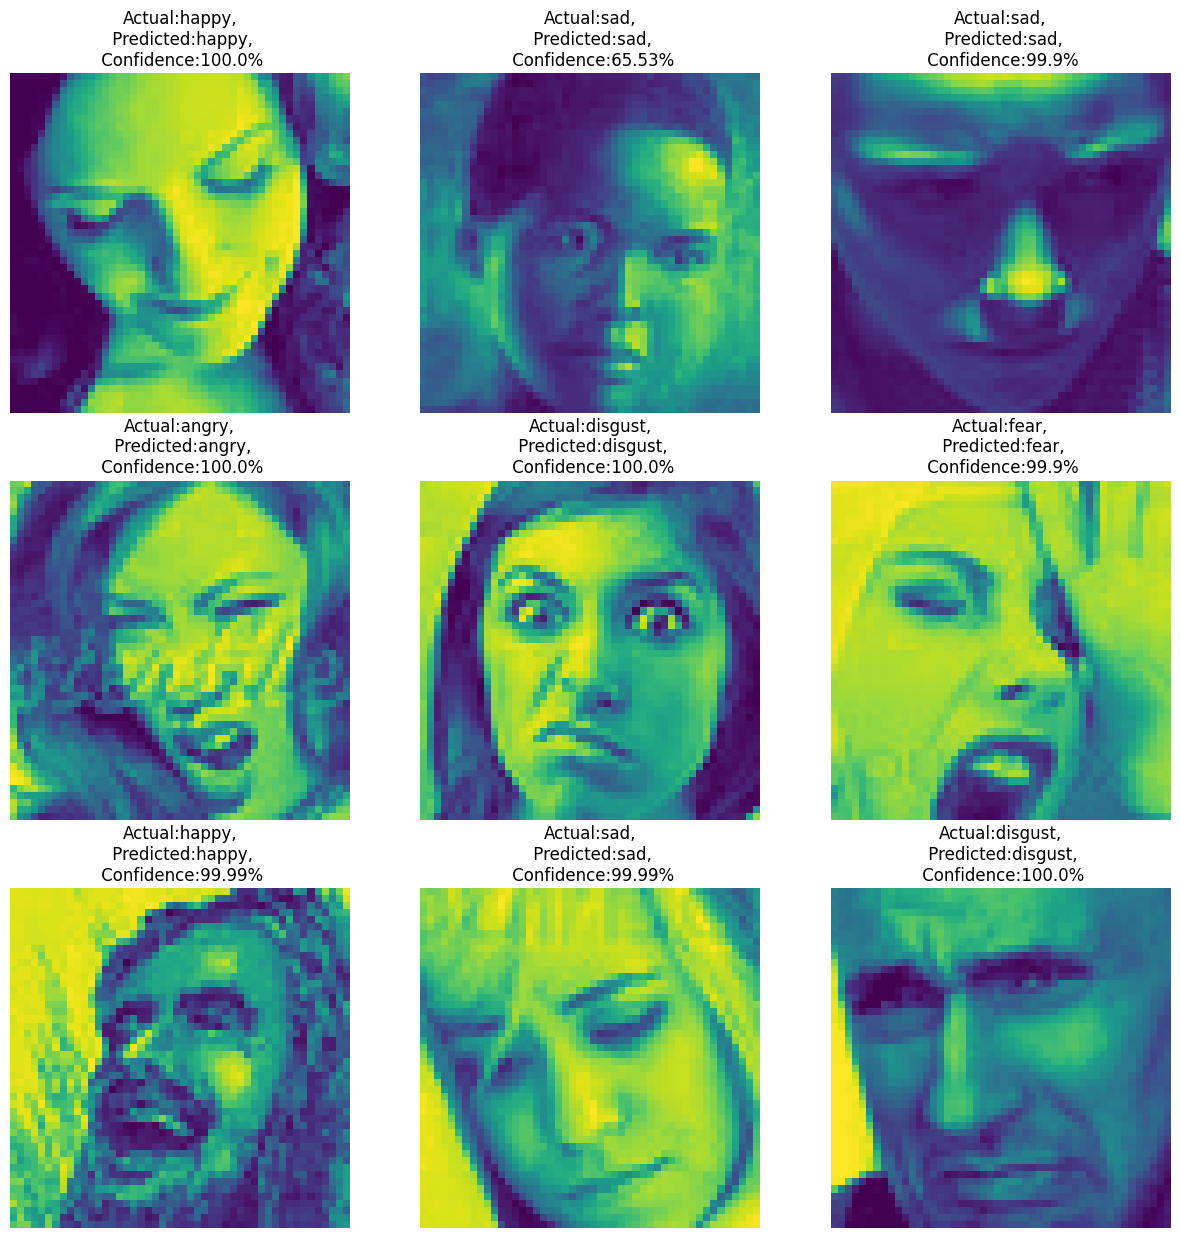

In [8]:
plt.figure(figsize=(15,15))
for img,lbl in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        pred = model.predict(img)
        pred_class = tf_dataset.class_names[np.argmax(pred[i])]
        confidence = round(100*(np.max(pred[i])),2)
        actual_class = tf_dataset.class_names[lbl[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{pred_class},\n Confidence:{confidence}%")
        plt.axis('off')

Save Model

In [ ]:
model.save(f"/content/drive/MyDrive/Fiver/fer3")